## Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) and independent variable (s) (predictor). This technique is used for forecasting and finding casue-effect relationship between variables.

### Import all the necessary libraries

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import metrics
%matplotlib inline

## 1.Data cleaning 

### Read data into dataframes and 

In [84]:
red=pd.read_csv("winequality-red.csv",sep=';',quotechar='"') #reading red wine dataste
white=pd.read_csv("winequality-white.csv",sep=';',quotechar='"') # reading white wine dataset

In [85]:
red.head() # preview of the red wine dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [86]:
white.head() # preview of the white wine dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [87]:
complete=pd.concat([red,white]) # merge two datasets

In [88]:
complete.head()# preview of the complete wine dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Statistical details of the dataset

In [91]:
complete.isna().any() # Check if we have any NA values in out dataset

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

### I found that there are no NA values in the dataset

## 2. Data Analysis

In [89]:
complete.describe() # dataset statistics

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


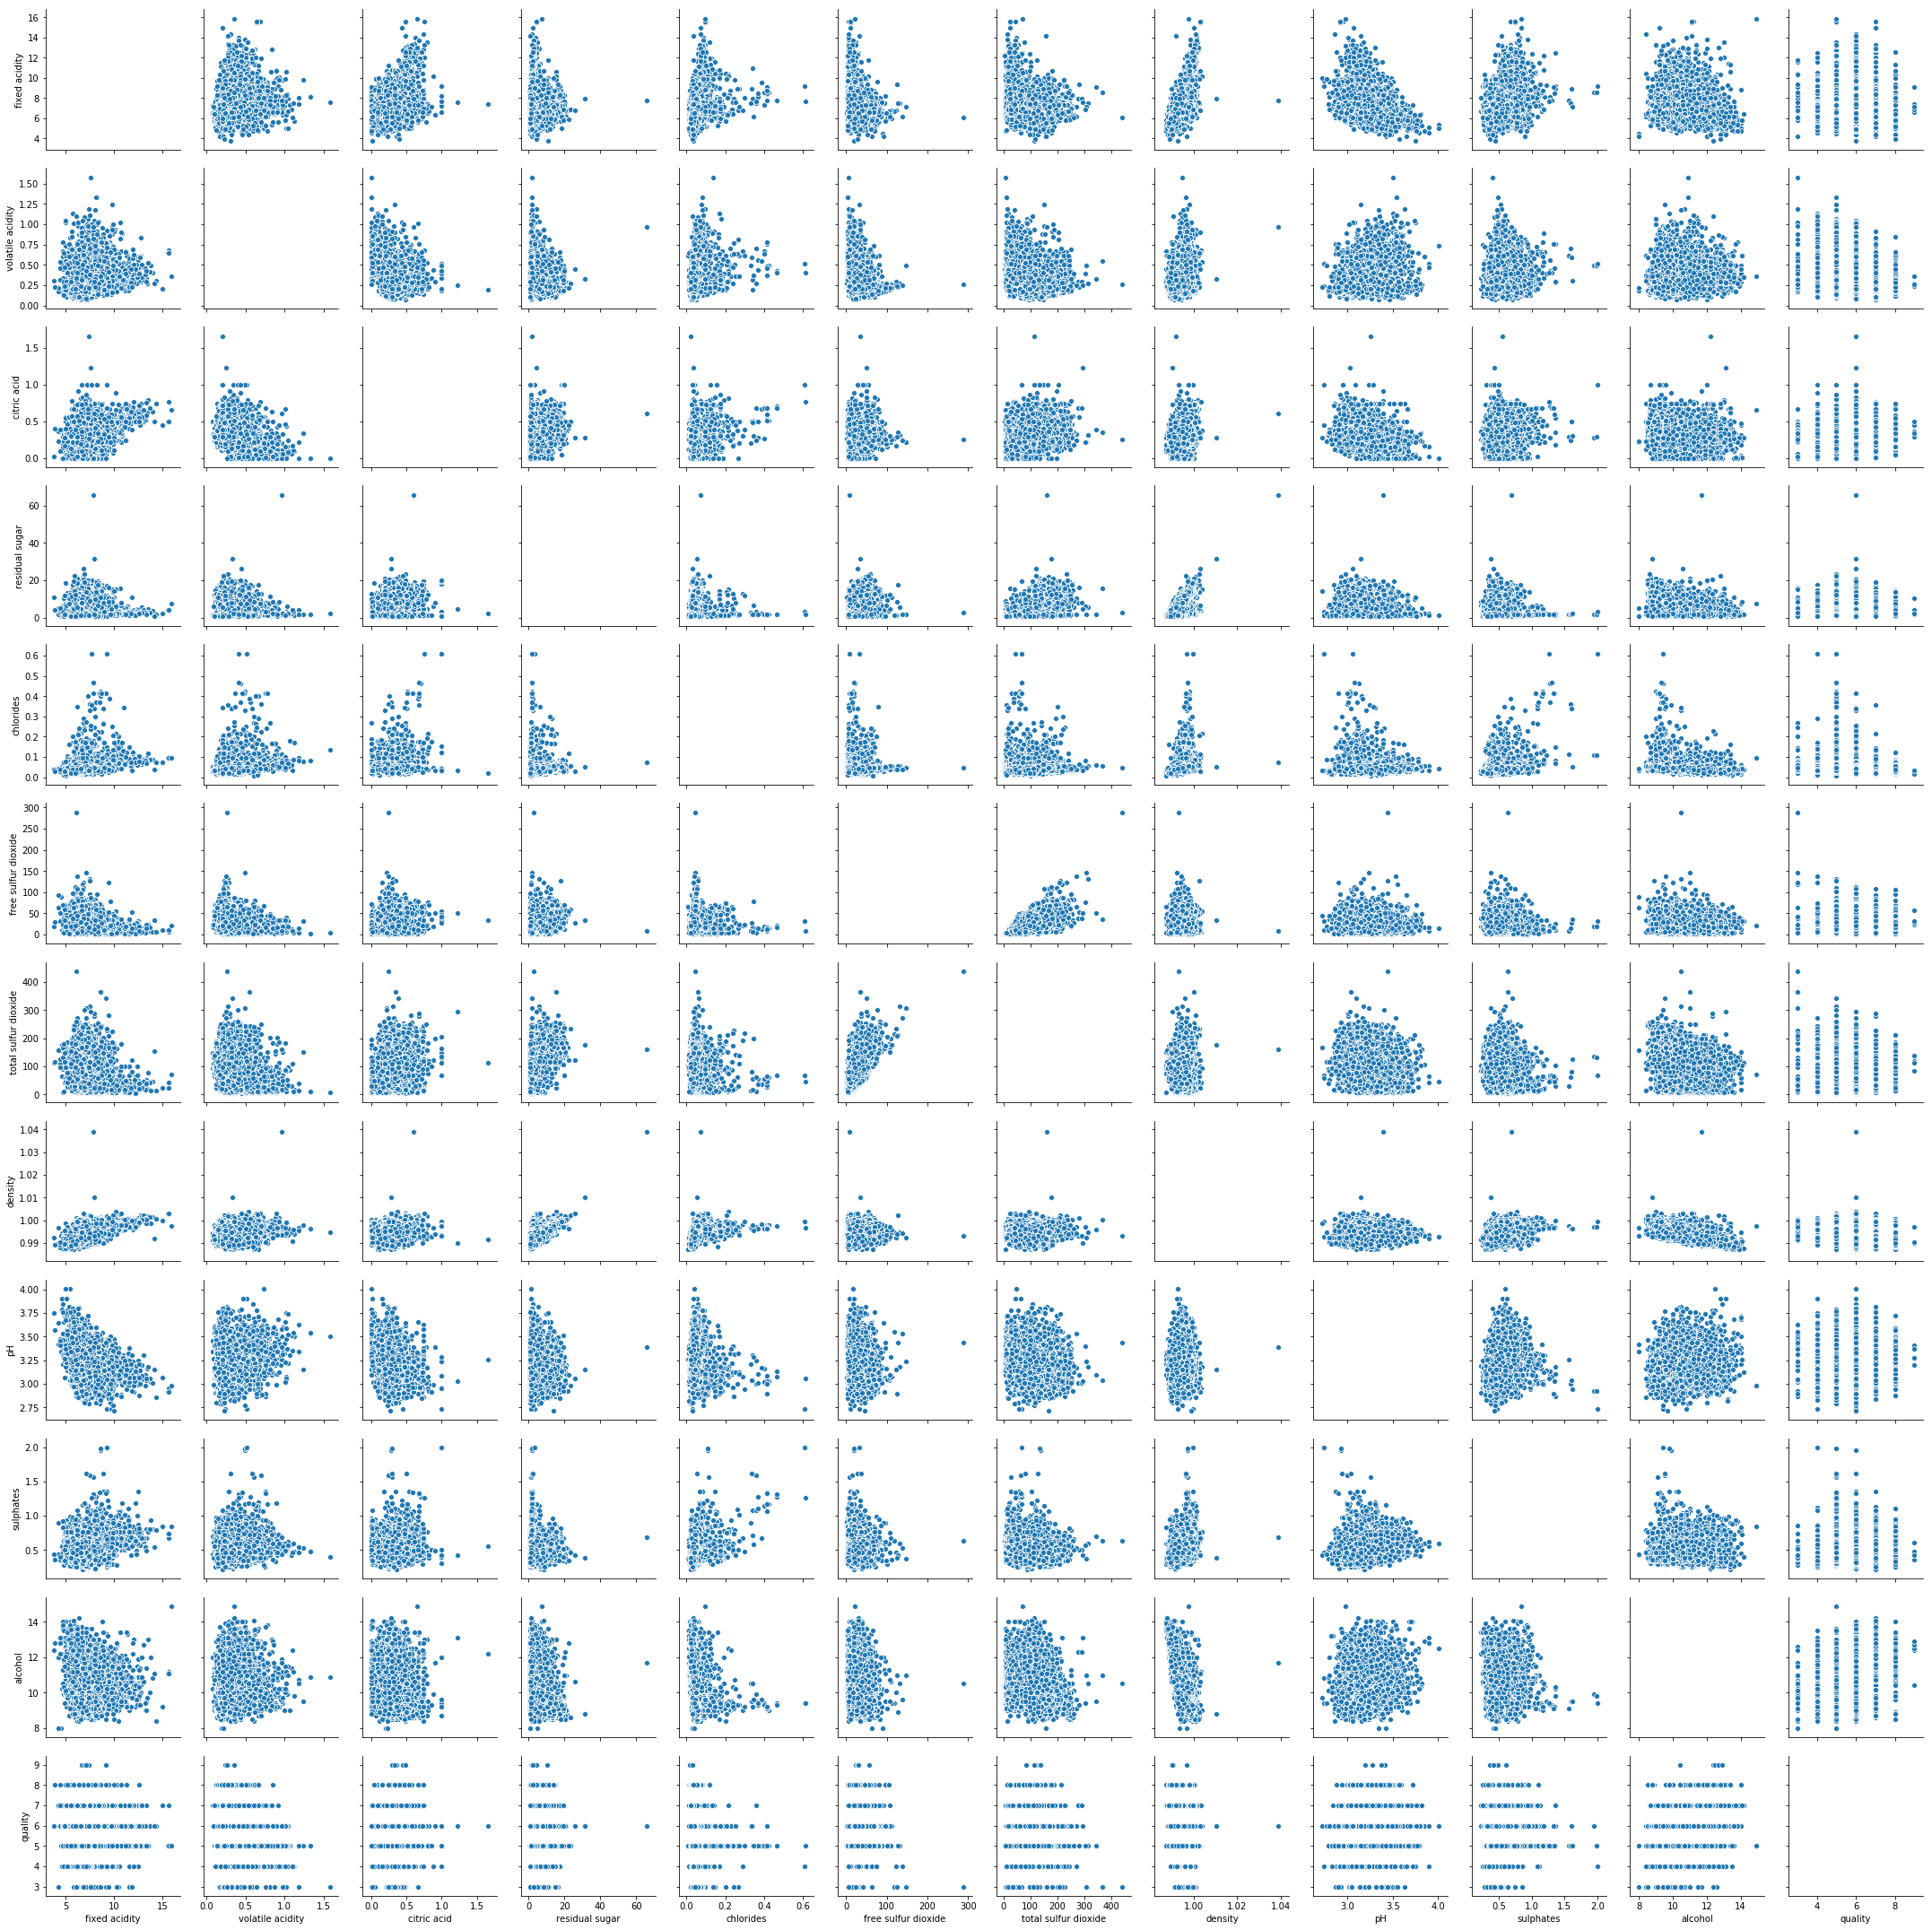

In [92]:
sb.pairplot(complete,diag_kind='reg') # Check if we have any correlation among variables in our dataset.

### calculate Pearsons correlation

In [115]:
# calculate Pearsons correlation to find of the correlation is linear or not
corr = complete.corr()
print('%.3f',corr)

%.3f                       fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidit

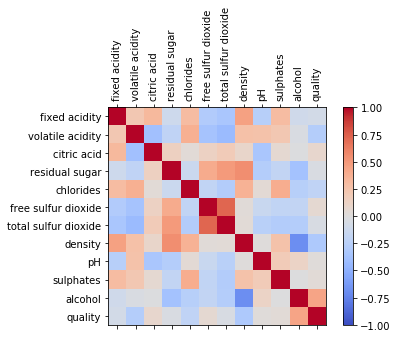

In [124]:
# Identify and plot correlations between variables in the dataset
corr = complete.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(complete.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(complete.columns)
ax.set_yticklabels(complete.columns)
plt.show()

### The dataset has correlations 

### As there are multiple variables in the dataset and there exist some degree of linear relation I am using multiple linear regression also called multivariate linear regression


## 3.Multivariate Linear Regression

In [155]:
# Predictor variables
X = complete[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
              'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
              'pH', 'sulphates','alcohol']].values
# target variable
y = complete['quality'].values

In [156]:
kf = KFold(n_splits=10,random_state=35,shuffle=True) # using KFold corssvalidation with shuffel  and a random state of 35
kf.get_n_splits(X) 
print(kf)

KFold(n_splits=10, random_state=35, shuffle=True)


In [157]:
#creating train and test split
for train_index, test_index in kf.split(X):    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [158]:
# initializing linear regression model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [161]:
# correlation coffecient after the training
coeff_df = pd.DataFrame(regressor.coef_, complete.columns[0:-1], columns=['Coefficient'])  
coeff_df

,Coefficient
fixed acidity,0.056264
volatile acidity,-1.333835
citric acid,-0.078218
residual sugar,0.042005
chlorides,-0.513358
free sulfur dioxide,0.005733
total sulfur dioxide,-0.002491
density,-48.512668
pH,0.413852
sulphates,0.740685


### For one unit increse in "Density" we see 48.51 units of decrease in wine quality
### With one unit increase in "voatile acidity" we see 1.33 unit decrese in wint quality
### with one unit increse in "sulphates" we see 0.7 unit increase in wine quality

In [163]:
# predecting Quality of wine
y_pred = regressor.predict(X_test)

In [164]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) # create a dataframe to compare the actual and predicted values
df1=df.head(30)
df.head(10)

,Actual,Predicted
0,6,5.668535
1,7,5.929946
2,6,5.695091
3,5,5.040088
4,4,5.050795
5,5,5.308038
6,5,5.400513
7,5,4.886033
8,4,5.210139
9,5,5.155392


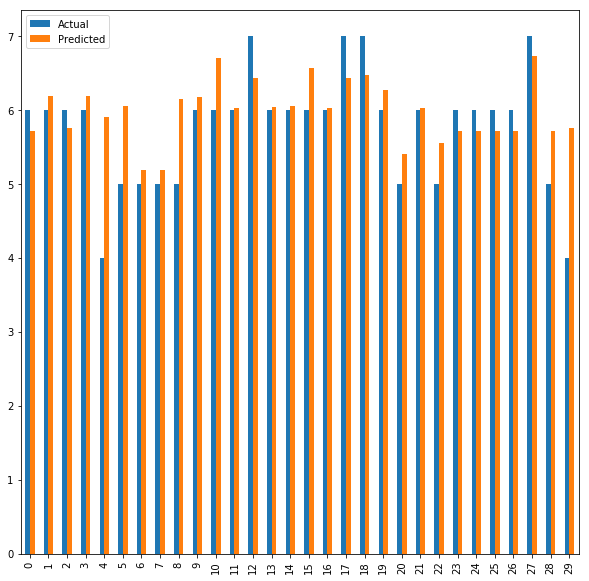

In [153]:
df1.plot(kind='bar',figsize=(10,10))
plt.show()

In [146]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.7018820470390564


### The root mean squared error value is 0.7 which is approximately 20% greater than the original value of 5.82